# stock market prediction
# codeclause .com

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
# for interactiveness
from ipywidgets import interact

In [38]:
# Read the dataset
d = pd.read_csv('Desktop/Final-50-stocks.csv')
# lets see the first 6 rows of the dataset
d.head(6)


DATE  TATASTEEL   WIPRO    TITAN  ULTRACEMO   TECHM  RELIANCE  \
0  2010-01-11     591.90  423.70  3792.50    6737.95  735.60   1093.20   
1  2010-01-12     613.55  414.70  3781.90    5443.70  671.15    988.80   
2  2010-02-11     599.05  433.85  3818.70    6735.25  724.55   1074.85   
3  2010-02-12     622.75  426.05  3784.20    5368.40  676.35   1011.15   
4  2010-03-11     609.60  434.70  3833.05    6858.65  732.50   1065.30   
5  2010-03-12     614.55  427.60  3696.45    5543.45  668.95   1005.90   

   SHREECEM  SUNPHARMA  TATAMOTORS  ...    BPCL  BRITANNIA  ADANIPORTS  \
0   2116.10    2190.70     1170.60  ...  754.80     413.15         NaN   
1   2094.10     448.65     1286.75  ...  697.95     410.30         NaN   
2   2164.55    2190.45     1154.25  ...  772.75     413.60         NaN   
3   2022.35     452.90     1320.15  ...  685.80     412.45         NaN   
4   2261.40    2249.30     1185.55  ...  765.60     415.75         NaN   
5   2014.10     444.90     1314.70  ...  673.85     398.90         NaN   

   BAJAJFINSERV  BAJAJFINANCE  BHARTIARTL  AXISBANK  BAJAJ-AUTO  ASIANPAINT  \
0        467.25        798.60      335.30   1513.60     1530.75     2705.05   
1        481.65        713.30      350.55   1424.45     1571.20     2680.40   
2        472.10        806.40      329.25   1526.60     1548.75     2792.80   
3        484.35        741.85      346.10   1455.35     1574.30     2651.85   
4        480.15        799.25      328.40   1536.10     1582.35     2694.90   
5        486.70        719.95      345.60   1406.15     1600.15     2670.05   

   UPL  
0  NaN  
1  NaN  
2  NaN  
3  NaN  
4  NaN  
5  NaN  

[6 rows x 47 columns]

In [39]:
# Lets Check missing values
d.isnull().sum()

DATE               0
TATASTEEL          0
WIPRO              0
TITAN              0
ULTRACEMO          0
TECHM              0
RELIANCE           0
SHREECEM           0
SUNPHARMA          0
TATAMOTORS         0
TCS                0
SBIN               0
NESTLEIND          0
NTPC               0
M&M                0
MARUTI             0
ONGC               0
POWERGRID          0
JSWSTEEL           0
KOTAKBANK          0
LT                 0
ICICIBANK          0
INDUSBANK          0
INFY             174
IOC                0
ITC                0
HEROMOTOCO       202
HINDALCO           0
HINDUNILVR         0
HCLTECH            0
HDFCBANK           0
HDFC               0
DRREDDYS           0
EICHERMOTOR        0
GRASIM             0
CIPLA              0
COALINDIA         12
BPCL               0
BRITANNIA          0
ADANIPORTS      1460
BAJAJFINSERV       0
BAJAJFINANCE       0
BHARTIARTL         0
AXISBANK           0
BAJAJ-AUTO         0
ASIANPAINT         0
UPL              752
dtype: int64

In [40]:
# lets drop the missing values
d.dropna(inplace=True)

In [41]:
# Lets Check missing values again
d.isnull().sum()


DATE            0
TATASTEEL       0
WIPRO           0
TITAN           0
ULTRACEMO       0
TECHM           0
RELIANCE        0
SHREECEM        0
SUNPHARMA       0
TATAMOTORS      0
TCS             0
SBIN            0
NESTLEIND       0
NTPC            0
M&M             0
MARUTI          0
ONGC            0
POWERGRID       0
JSWSTEEL        0
KOTAKBANK       0
LT              0
ICICIBANK       0
INDUSBANK       0
INFY            0
IOC             0
ITC             0
HEROMOTOCO      0
HINDALCO        0
HINDUNILVR      0
HCLTECH         0
HDFCBANK        0
HDFC            0
DRREDDYS        0
EICHERMOTOR     0
GRASIM          0
CIPLA           0
COALINDIA       0
BPCL            0
BRITANNIA       0
ADANIPORTS      0
BAJAJFINSERV    0
BAJAJFINANCE    0
BHARTIARTL      0
AXISBANK        0
BAJAJ-AUTO      0
ASIANPAINT      0
UPL             0
dtype: int64

In [42]:
print("shape of my dataset:", d.shape)

shape of my dataset: (1251, 47)


In [43]:
# Check for duplicates
d.duplicated().sum()

0

In [44]:
# Lets calculate summary statistics
d.describe()

TATASTEEL        WIPRO        TITAN    ULTRACEMO        TECHM  \
count  1251.000000  1251.000000  1251.000000  1251.000000  1251.000000   
mean    576.056195   347.243405  1001.585771  3172.454556   699.693885   
std     249.033145   114.144782   404.673364  1650.465183   229.188370   
min     253.750000   162.350000   303.300000   897.250000   376.300000   
25%     419.525000   264.550000   792.350000  1877.100000   499.950000   
50%     511.750000   297.700000   964.500000  2989.600000   692.050000   
75%     635.875000   439.525000  1230.925000  4057.375000   792.750000   
max    1519.400000   708.250000  2564.050000  8026.250000  1521.500000   

          RELIANCE      SHREECEM    SUNPHARMA   TATAMOTORS          TCS  ...  \
count  1251.000000   1251.000000  1251.000000  1251.000000  1251.000000  ...   
mean   1425.395963  19876.715508   545.282814   279.268425  2458.841447  ...   
std     439.467235   4063.682776   108.173525   135.081809   495.301491  ...   
min     780.900000  13395.200000   324.500000    65.300000  1636.350000  ...   
25%    1073.325000  16938.400000   456.325000   167.225000  2081.125000  ...   
50%    1310.250000  18664.100000   526.050000   268.800000  2320.500000  ...   
75%    1732.725000  21726.975000   627.225000   403.900000  2721.325000  ...   
max    2700.400000  31748.750000   842.550000   587.400000  3954.550000  ...   

              BPCL    BRITANNIA   ADANIPORTS  BAJAJFINSERV  BAJAJFINANCE  \
count  1251.000000  1251.000000  1251.000000   1251.000000   1251.000000   
mean    456.519704  3808.706875   331.130855   6869.373621   3014.949840   
std     111.302097   990.840554   168.930427   2956.367659   1628.144289   
min     257.200000  2137.850000   108.850000   2550.100000    765.400000   
25%     376.325000  3099.875000   206.700000   5030.025000   1761.875000   
50%     428.200000  3509.800000   321.250000   6127.650000   2640.400000   
75%     499.925000  4224.725000   383.150000   8354.625000   4004.225000   
max     754.850000  6900.150000   878.600000  18526.000000  11393.300000   

        BHARTIARTL     AXISBANK   BAJAJ-AUTO   ASIANPAINT          UPL  
count  1251.000000  1251.000000  1251.000000  1251.000000  1251.000000  
mean    428.283973   596.369305  3031.454956  1624.666107   672.248561  
std      98.415113   118.589523   418.353912   605.747738   150.316378  
min     285.350000   303.150000  1935.550000   865.550000   254.600000  
25%     346.900000   505.450000  2780.600000  1163.600000   568.850000  
50%     402.000000   566.700000  2914.150000  1401.950000   695.900000  
75%     517.200000   716.650000  3175.675000  1815.500000   773.450000  
max     739.400000   822.800000  4295.050000  3448.600000  1034.500000  

[8 rows x 46 columns]

array([[<Axes: title={'center': 'TATASTEEL'}>,
        <Axes: title={'center': 'WIPRO'}>,
        <Axes: title={'center': 'TITAN'}>,
        <Axes: title={'center': 'ULTRACEMO'}>,
        <Axes: title={'center': 'TECHM'}>,
        <Axes: title={'center': 'RELIANCE'}>,
        <Axes: title={'center': 'SHREECEM'}>],
       [<Axes: title={'center': 'SUNPHARMA'}>,
        <Axes: title={'center': 'TATAMOTORS'}>,
        <Axes: title={'center': 'TCS'}>,
        <Axes: title={'center': 'SBIN'}>,
        <Axes: title={'center': 'NESTLEIND'}>,
        <Axes: title={'center': 'NTPC'}>,
        <Axes: title={'center': 'M&M'}>],
       [<Axes: title={'center': 'MARUTI'}>,
        <Axes: title={'center': 'ONGC'}>,
        <Axes: title={'center': 'POWERGRID'}>,
        <Axes: title={'center': 'JSWSTEEL'}>,
        <Axes: title={'center': 'KOTAKBANK'}>,
        <Axes: title={'center': 'LT'}>,
        <Axes: title={'center': 'ICICIBANK'}>],
       [<Axes: title={'center': 'INDUSBANK'}>,
        <Axes:

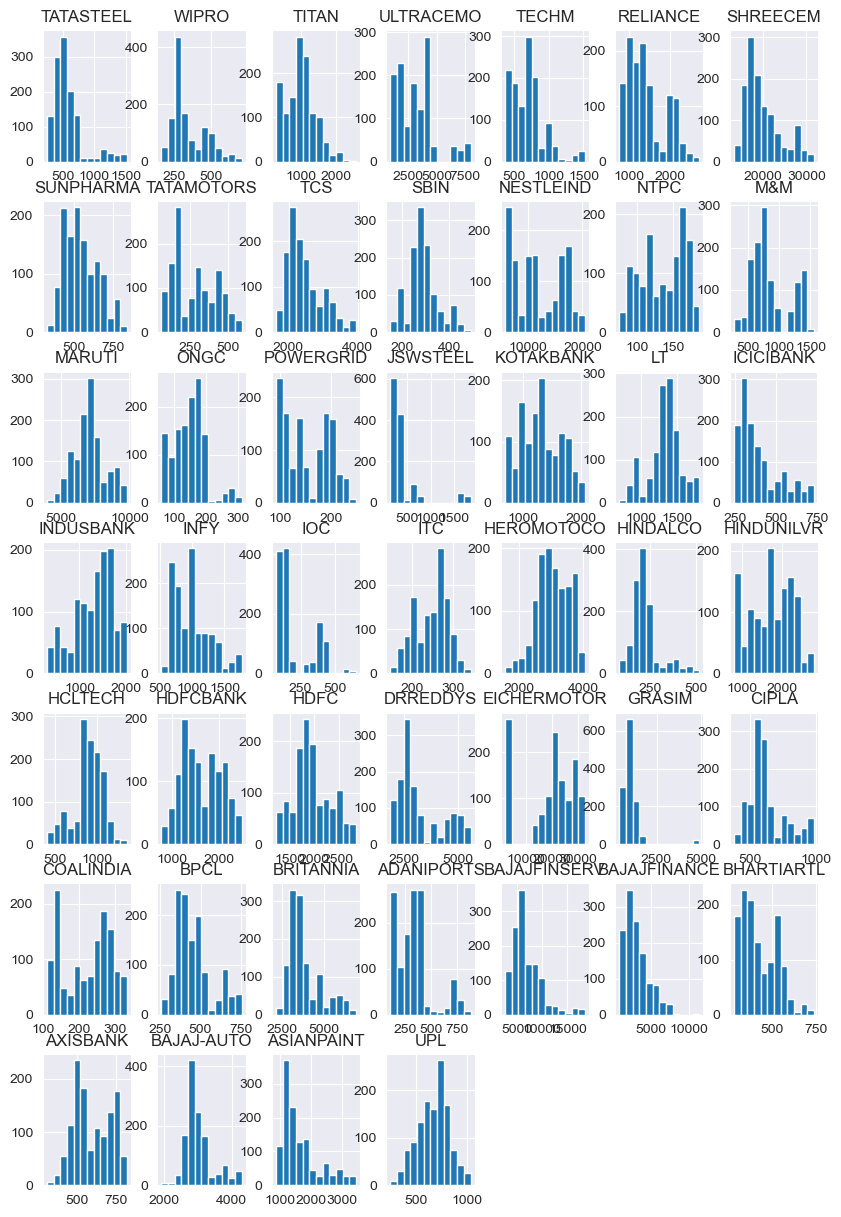

In [45]:
# Now we will visualize the data using histograms
d.hist(bins=12, figsize=(10,15))

<Axes: xlabel='TITAN', ylabel='NTPC'>

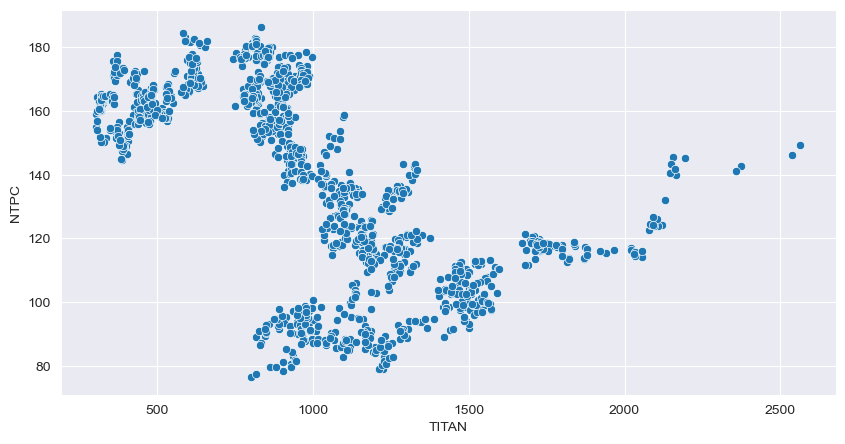

In [46]:
# Lets visualize the data using scatterplots
sns.scatterplot(x='TITAN', y='NTPC', data=d)

<Axes: xlabel='WIPRO', ylabel='TCS'>

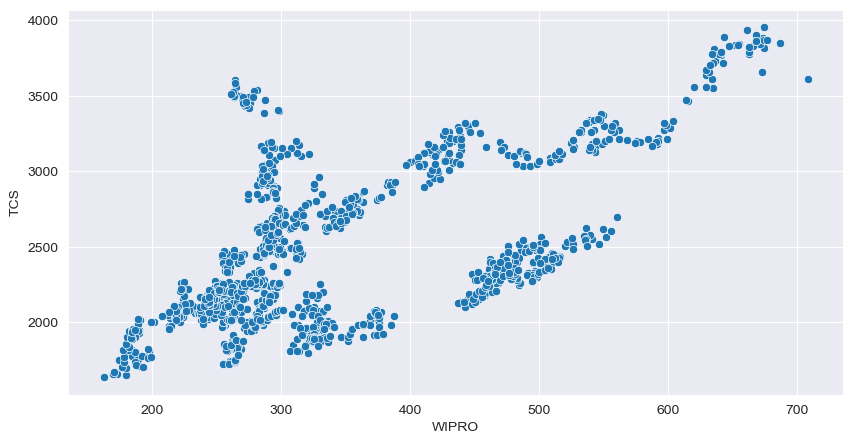

In [47]:
# Lets visualize the data using scatterplots
sns.scatterplot(x='WIPRO', y='TCS', data=d)

<Axes: >

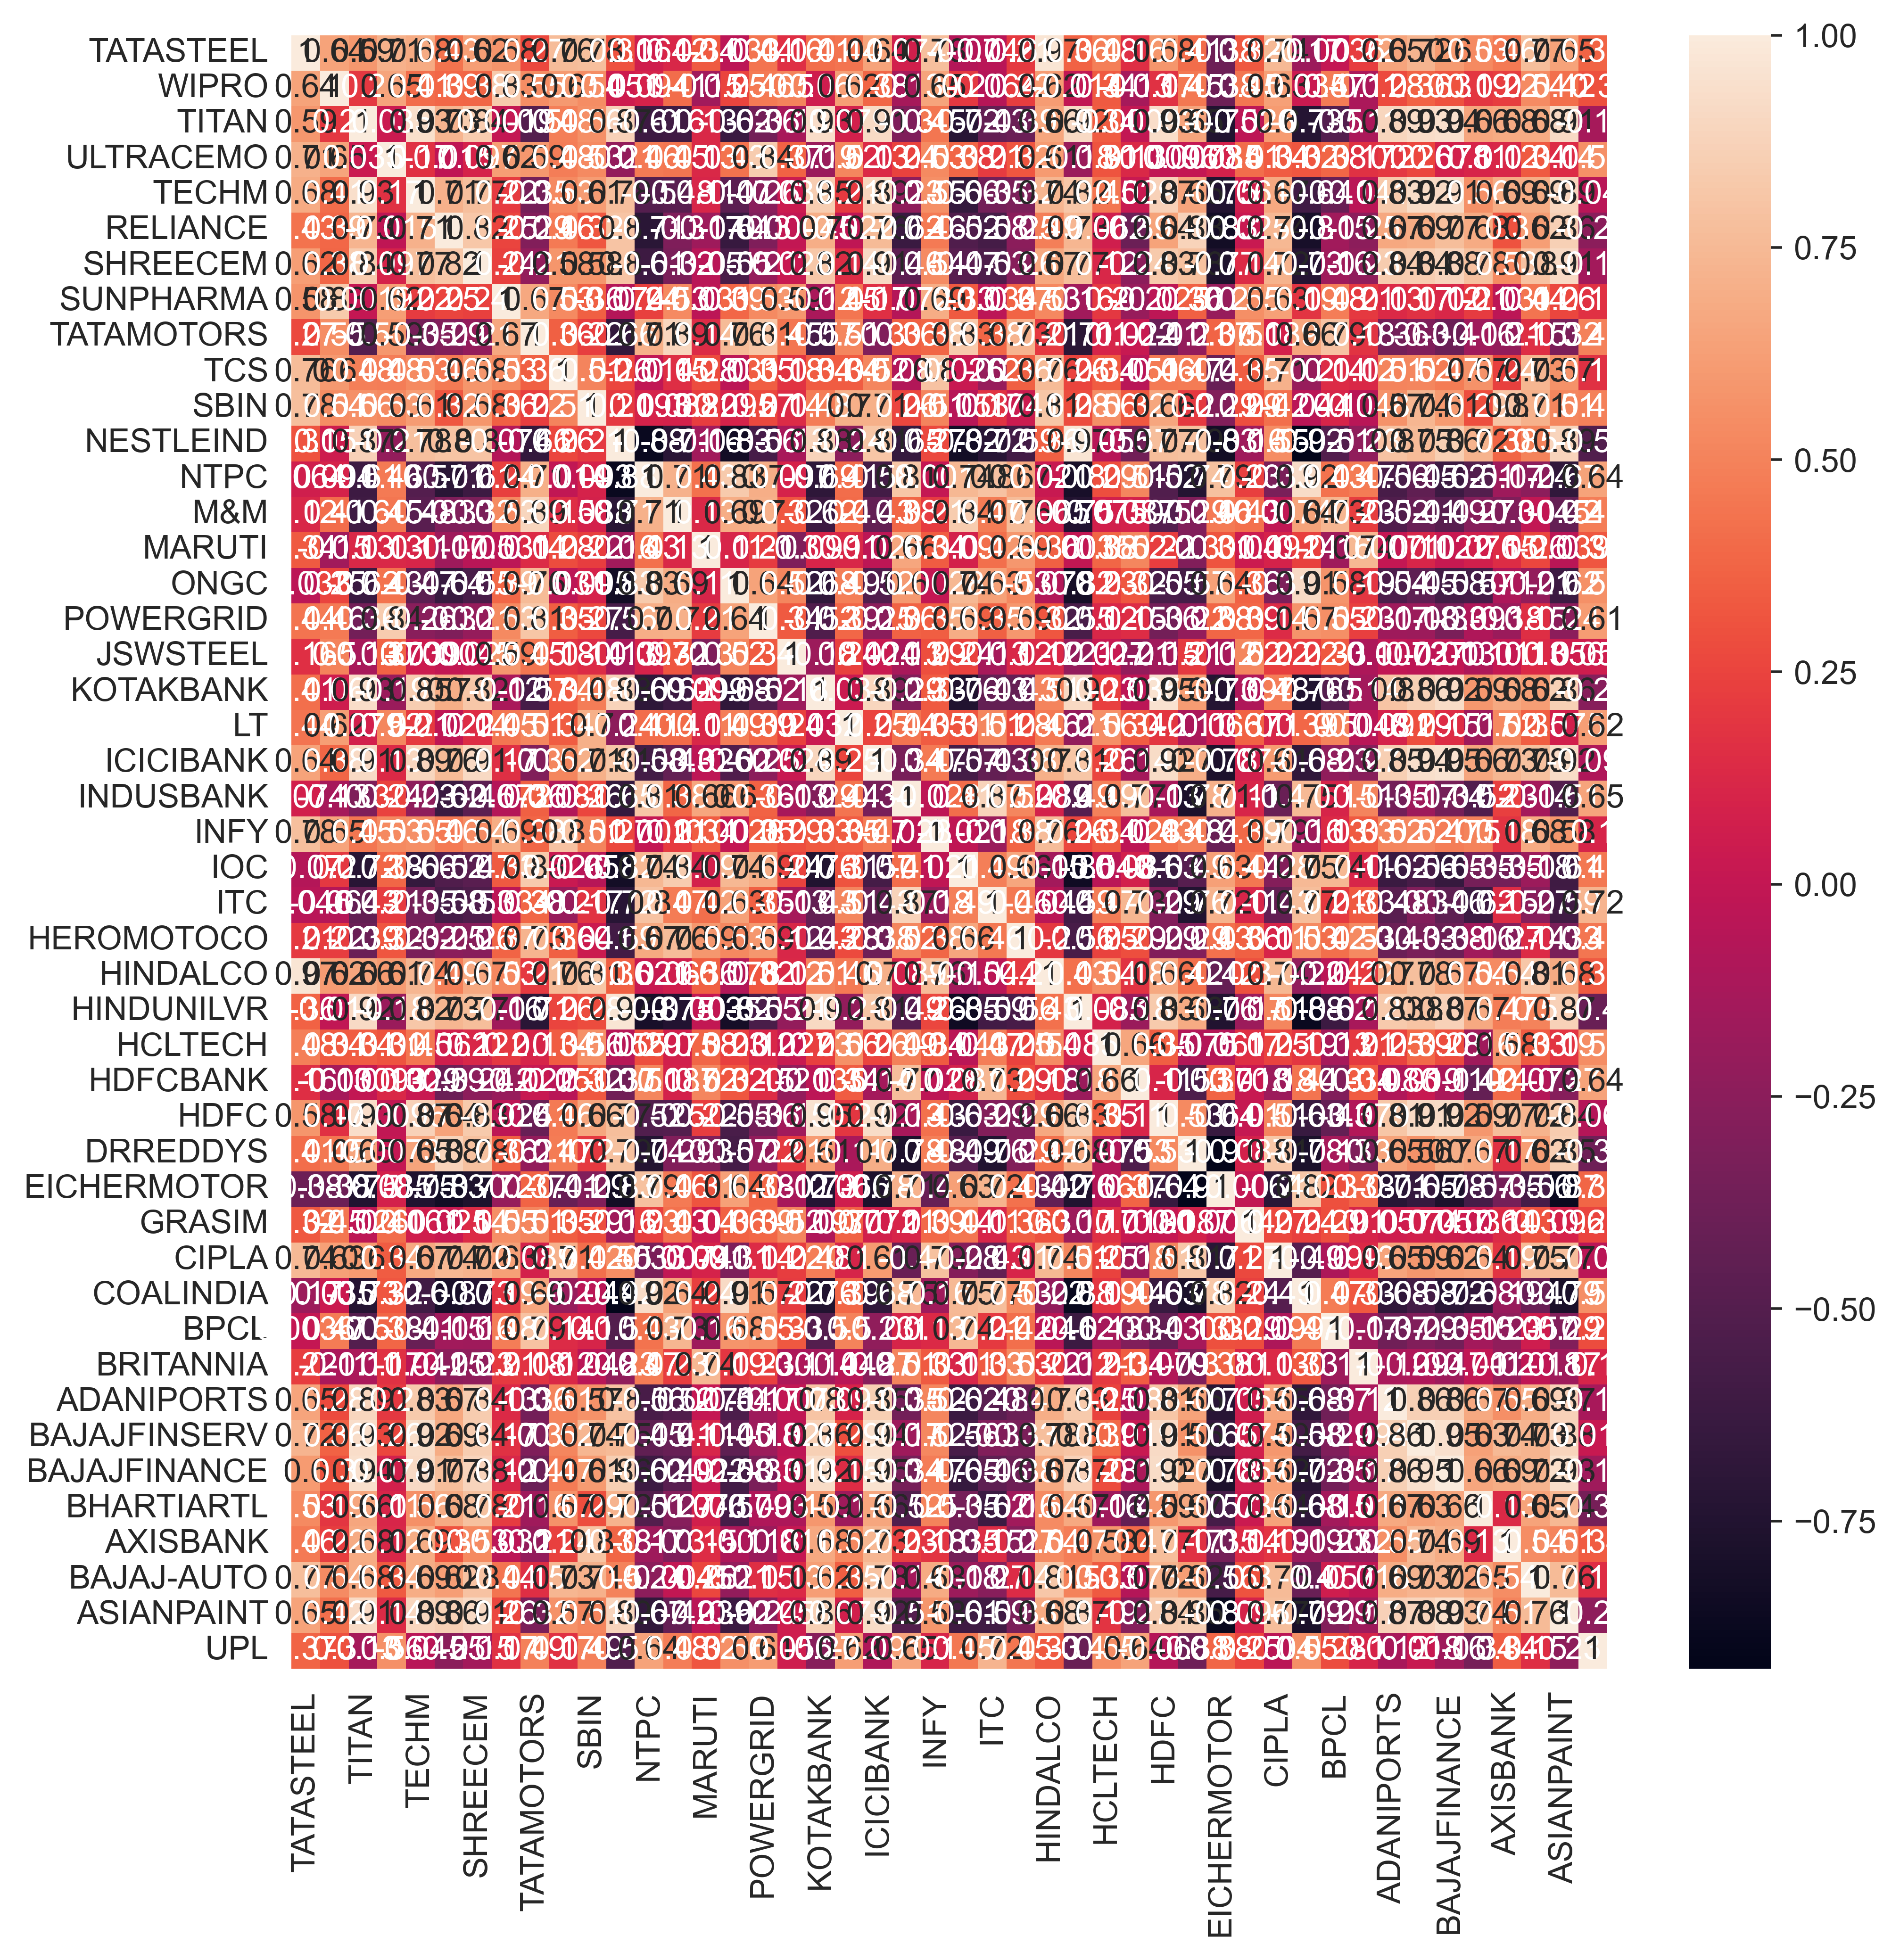

In [48]:
#Lets analyse the correlation between each variable
plt.figure(figsize=(9,9),dpi = 500)
sns.heatmap(d.corr(),annot = True)

<Axes: xlabel='WIPRO', ylabel='TCS'>

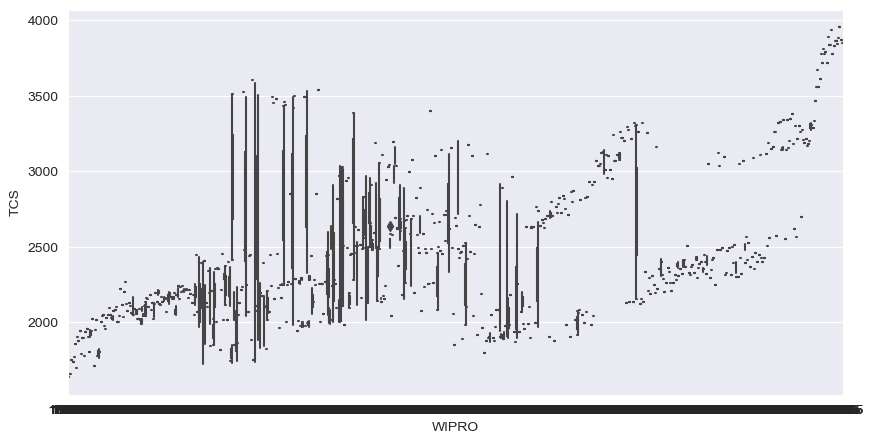

In [49]:
# Lets visualize the data using boxplots
sns.boxplot(x='WIPRO', y='TCS', data=d)

<Axes: xlabel='TITAN', ylabel='NTPC'>

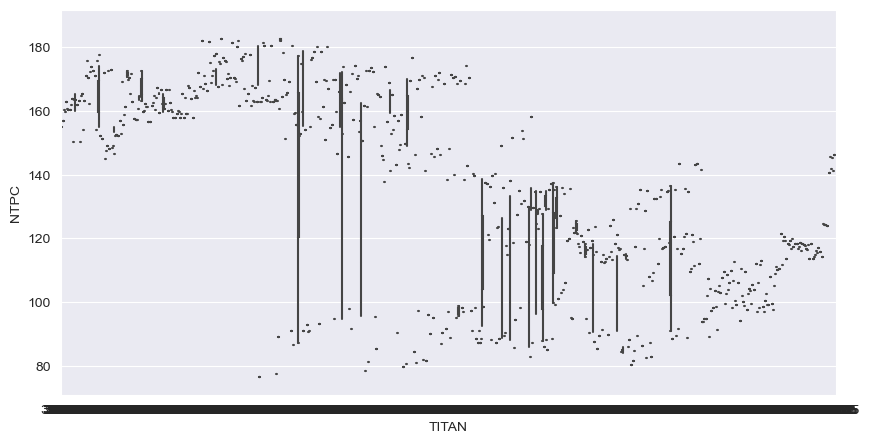

In [50]:
# Lets visualize the data using boxplots
sns.boxplot(x='TITAN', y='NTPC', data=d)

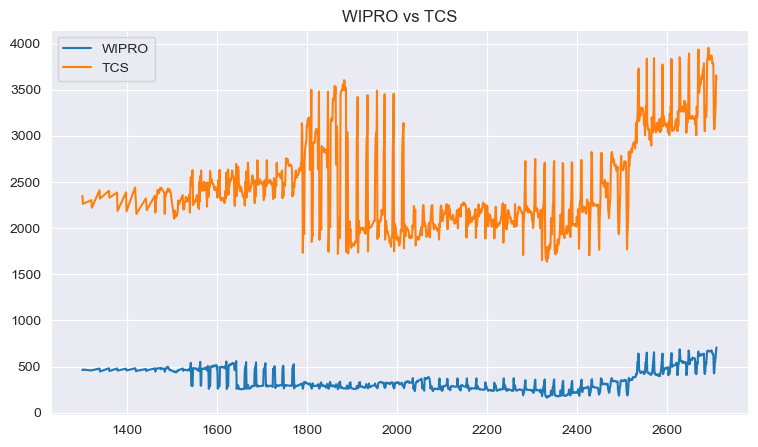

In [51]:
sns.set_style('darkgrid')
plt.figure(figsize=(9,5),dpi = 100)
plt.title('WIPRO vs TCS')
plt.plot(d['WIPRO'], label = 'WIPRO')
plt.plot(d['TCS'], label = 'TCS')
plt.legend()

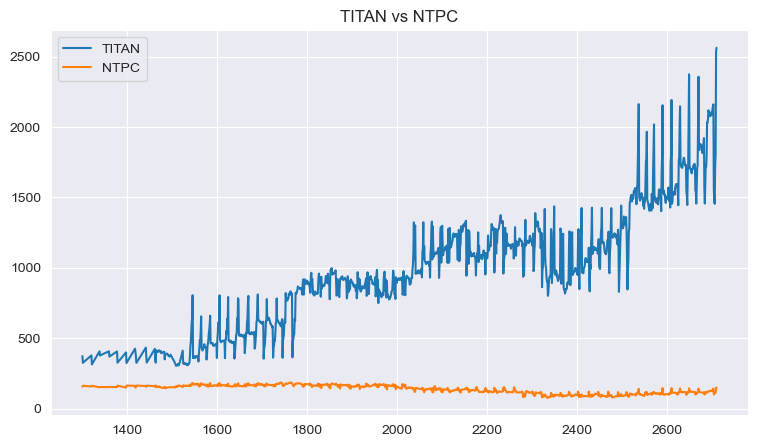

In [52]:
sns.set_style('darkgrid')
plt.figure(figsize=(9,5),dpi = 100)
plt.title('TITAN vs NTPC')
plt.plot(d['TITAN'], label = 'TITAN')
plt.plot(d['NTPC'], label = 'NTPC')
plt.legend()

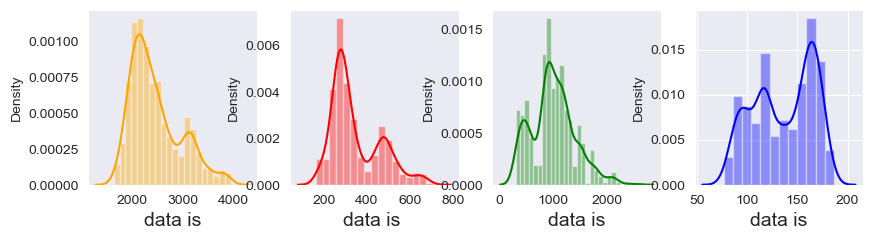

In [53]:
plt.subplot(2,4,1)
sns.distplot(d['TCS'], color = 'orange')
plt.xlabel('data is', fontsize = 14)
plt.grid()
plt.subplot(2,4,2)
sns.distplot(d['WIPRO'], color = 'Red')
plt.xlabel('data is ', fontsize = 14)
plt.grid()
plt.subplot(2,4,3)
sns.distplot(d['TITAN'], color = 'Green')
plt.xlabel('data is', fontsize = 14)
plt.grid()
plt.subplot(2,4,4)
sns.distplot(d['NTPC'], color = 'blue')
plt.xlabel('data is', fontsize = 14)


plt.show()

In [54]:
from sklearn.cluster import KMeans
# removing the label column
x = d.drop(['DATE'],axis=1)
# selectiing all the values of the data
x = x.values
# checking the shape
print(x.shape)

(1251, 46)


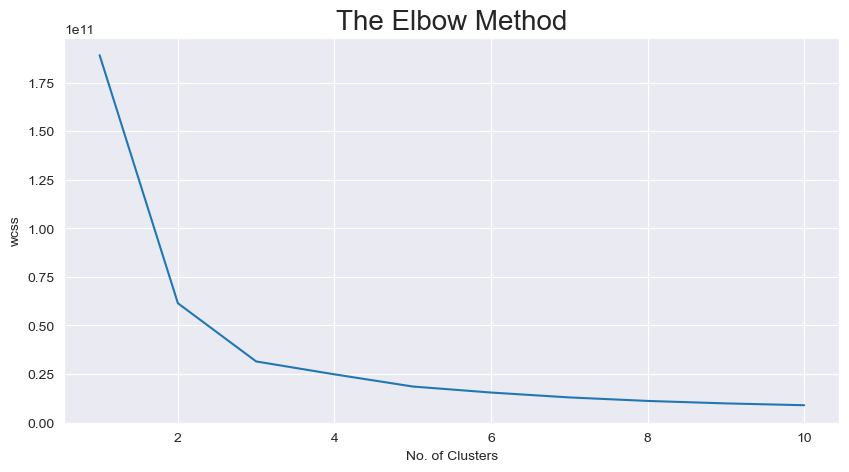

In [55]:
# lets determine the optimum number of clusters within the dataset
plt.rcParams['figure.figsize'] = (10,5)
wcss = []
for i in range(1,11):
    a = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    a.fit(x)
    wcss.append(a.inertia_)
    
# lets plot the results
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [56]:
# lets implement the K Means algorithm to perform clustering analysis
a = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = a.fit_predict(x)
# lets find out the results
b = d['DATE']
y_means = pd.DataFrame(y_means)
z = pd.concat([y_means, b], axis = 1)
z = z.rename(columns = {0: 'cluster'})
# let us check the cluster of each crops
print("lets check the results after applying the K-Means clustering Analysis \n")
print("data in first cluster:", z[z['cluster'] == 0]['DATE'].unique())
print("data in 2nd cluster:", z[z['cluster'] == 1]['DATE'].unique())
print("data in 3rd cluster:", z[z['cluster'] == 2]['DATE'].unique())
print("data in fourth cluster:", z[z['cluster'] == 3]['DATE'].unique())

lets check the results after applying the K-Means clustering Analysis 

data in first cluster: [nan]
data in 2nd cluster: [nan]
data in 3rd cluster: [nan]
data in fourth cluster: [nan]


In [57]:
# lets split the dataset for predictive modelling
y = d['DATE']
x = d.drop(['DATE'], axis = 1)
print("shape of x:", x.shape)
print("shape of y:", y.shape)

shape of x: (1251, 46)
shape of y: (1251,)


In [68]:
# lets create training and testing sets for validation of results
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)
print("the shape of x train:" , x_train.shape)
print("the shape of x test:" , x_test.shape)
print("the shape of y train:" , y_train.shape)
print("the shape of y test:" , y_test.shape)

the shape of x train: (1000, 46)
the shape of x test: (251, 46)
the shape of y train: (1000,)
the shape of y test: (251,)


In [ ]:
# lets create a predictive model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred))

In [60]:
# lets check the head of the dataset
d.head()

DATE  TATASTEEL   WIPRO  TITAN  ULTRACEMO   TECHM  RELIANCE  \
1300  2016-01-11     417.70  460.75  372.7    4285.30  433.55   1051.00   
1301  2016-01-12     409.60  468.30  324.9    4281.35  475.05    997.75   
1320  2016-02-11     413.35  457.90  377.6    4170.30  429.80   1023.75   
1321  2016-02-12     406.40  460.40  313.2    4341.65  473.40    994.75   
1338  2016-03-10     382.85  478.95  406.6    4001.15  420.70   1090.70   

      SHREECEM  SUNPHARMA  TATAMOTORS  ...    BPCL  BRITANNIA  ADANIPORTS  \
1300  16815.25     733.75       530.6  ...  676.15    3330.55      126.05   
1301  14990.30     721.50       448.2  ...  628.90    3003.35      121.15   
1320  16465.80     714.05       513.3  ...  660.15    3302.60      124.10   
1321  15063.30     720.35       432.9  ...  608.15    2976.80      124.05   
1338  17892.90     757.05       540.8  ...  627.75    3485.55      143.55   

      BAJAJFINSERV  BAJAJFINANCE  BHARTIARTL  AXISBANK  BAJAJ-AUTO  \
1300       3458.90       1060.80      317.45    475.80     2825.60   
1301       2939.30        914.20      318.20    466.05     2694.90   
1320       3372.55       1019.85      309.60    476.80     2818.80   
1321       2977.65        886.50      318.60    459.95     2701.35   
1338       3194.65       1086.70      318.70    550.90     2880.90   

      ASIANPAINT     UPL  
1300     1076.70  706.25  
1301      939.15  650.50  
1320     1062.75  680.15  
1321      904.85  652.20  
1338     1193.00  680.20  

[5 rows x 47 columns]